In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
from skimage import exposure
import imageio

In [2]:
INPUT = 'data/'
PRIMITIVES = 'primitives/'

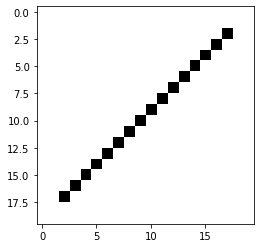

In [18]:
primitive_1 = np.ones((20, 20))
diagonal_1, diagonal_2 = np.meshgrid(np.arange(0, 20), np.arange(0, 20))
diagonal = np.vectorize(lambda x, y: 0 if x + y == 19  else 1)(diagonal_1, diagonal_2)
diagonal[0:2,:] = 1
diagonal[:, 0:2] = 1
primitive_1 *= diagonal
plt.imshow(primitive_1, cmap='gray', vmin=0, vmax=1)

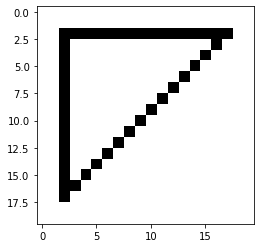

In [4]:
primitive_2 = np.ones((20, 20))
primitive_2[2:18, 2:3] = 0 
primitive_2[2:3, 2:18] = 0 
diagonal_1, diagonal_2 = np.meshgrid(np.arange(0, 20), np.arange(0, 20))
diagonal = np.vectorize(lambda x, y: 0 if x + y == 19  else 1)(diagonal_1, diagonal_2)
diagonal[0:2,:] = 1
diagonal[:, 0:2] = 1
primitive_2 *= diagonal
plt.imshow(primitive_2, cmap='gray')

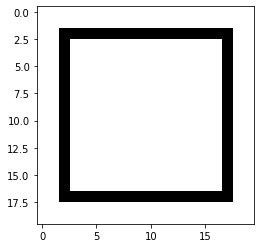

In [5]:
primitive_3 = np.ones((20, 20))
primitive_3[2:18, 2:3] = 0 
primitive_3[2:18, 17:18] = 0 
primitive_3[17:18, 2:18] = 0 
primitive_3[2:3, 2:18] = 0 
plt.imshow(primitive_3, cmap='gray')

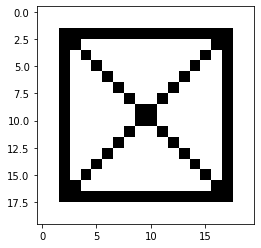

In [6]:
primitive_4 = np.ones((20, 20))
primitive_4[2:18, 2:3] = 0 
primitive_4[2:18, 17:18] = 0 
primitive_4[17:18, 2:18] = 0 
primitive_4[2:3, 2:18] = 0 
diagonal_1, diagonal_2 = np.meshgrid(np.arange(0, 20), np.arange(0, 20))
diagonal = np.vectorize(lambda x, y: 0 if x == y or x + y == 19  else 1)(diagonal_1, diagonal_2)
diagonal[0:2,:] = 1
diagonal[18:20,:] = 1
primitive_4 *= diagonal
plt.imshow(primitive_4, cmap='gray')

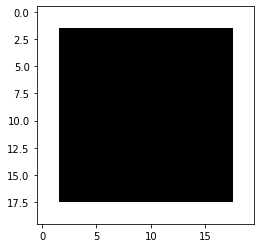

In [7]:
primitive_5 = np.ones((20, 20))
primitive_5[2:18, 2:18] = 0
plt.imshow(primitive_5, cmap='gray', vmin=0, vmax=1)

In [15]:
def save_array_prim(array, filename):
    imageio.imwrite(PRIMITIVES + filename, array.astype('int'))
    

def create_primitives():
    primitive_1 = np.ones((20, 20))
    diagonal_1, diagonal_2 = np.meshgrid(np.arange(0, 20), np.arange(0, 20))
    diagonal = np.vectorize(lambda x, y: 0 if x + y == 19  else 1)(diagonal_1, diagonal_2)
    diagonal[0:2,:] = 1
    diagonal[:, 0:2] = 1
    primitive_1 *= diagonal
    
    primitive_2 = np.ones((20, 20))
    primitive_2[2:18, 2:3] = 0 
    primitive_2[2:3, 2:18] = 0 
    diagonal_1, diagonal_2 = np.meshgrid(np.arange(0, 20), np.arange(0, 20))
    diagonal = np.vectorize(lambda x, y: 0 if x + y == 19  else 1)(diagonal_1, diagonal_2)
    diagonal[0:2,:] = 1
    diagonal[:, 0:2] = 1
    primitive_2 *= diagonal
    
    primitive_3 = np.ones((20, 20))
    primitive_3[2:18, 2:3] = 0 
    primitive_3[2:18, 17:18] = 0 
    primitive_3[17:18, 2:18] = 0 
    primitive_3[2:3, 2:18] = 0 
    
    primitive_4 = np.ones((20, 20))
    primitive_4[2:18, 2:3] = 0 
    primitive_4[2:18, 17:18] = 0 
    primitive_4[17:18, 2:18] = 0 
    primitive_4[2:3, 2:18] = 0 
    diagonal_1, diagonal_2 = np.meshgrid(np.arange(0, 20), np.arange(0, 20))
    diagonal = np.vectorize(lambda x, y: 0 if x == y or x + y == 19  else 1)(diagonal_1, diagonal_2)
    diagonal[0:2,:] = 1
    diagonal[18:20,:] = 1
    primitive_4 *= diagonal
    
    primitive_5 = np.ones((20, 20))
    primitive_5[2:18, 2:18] = 0
    
    save_array_prim(primitive_1, 'primitive_1.jpg')
    save_array_prim(primitive_2, 'primitive_2.jpg')
    save_array_prim(primitive_3, 'primitive_3.jpg')
    save_array_prim(primitive_4, 'primitive_4.jpg')
    save_array_prim(primitive_5, 'primitive_5.jpg')
    

def get_array(image, cell):
    height, width = image.shape
    shape_by_height, shape_by_width = round(height / cell[0]), round(width / cell[1])
    resized_image = cv2.resize(image, (shape_by_width * cell[1], shape_by_height * cell[0]))
    brightness_array = np.empty(shape=(shape_by_height, shape_by_width))
    for i in range(shape_by_height):
        for j in range(shape_by_width):
            brightness_array[i][j] = np.mean(resized_image[i * cell[0]:i * cell[0] + cell[0], j * cell[1]:j * cell[1] + cell[1]])
    return brightness_array


def get_array_easy_way(image, cell):
    height, width = image.shape
    shape_by_height, shape_by_width = round(height / cell[0]), round(width / cell[1])
    return cv2.resize(image, (shape_by_width, shape_by_height))
  
    
def equalize(array):
    return exposure.equalize_hist(array)


def normalize(array, new_min, new_max): 
    return new_min + (new_max - new_min) * (array - array.min()) / (array.max() - array.min()) 
    
    
def rounded(array):
    return array.round().astype('int')
    
        
def image_read(filename):
    return cv2.imread(INPUT + filename)

        
def image_transform(image, cell, shades):
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    brightness_array = get_array(grayscale_image, cell)
    equalize_array = equalize(brightness_array)
    normalized_array = normalize(equalize_array, 0, shades - 1)
    rounded_array = rounded(normalized_array)
    return rounded_array 


def show_image(image):
    plt.figure(figsize=(40,40))
    plt.imshow(image, cmap='gray')

### Важно! Запустить один раз для создания примитивов

In [16]:
create_primitives()

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


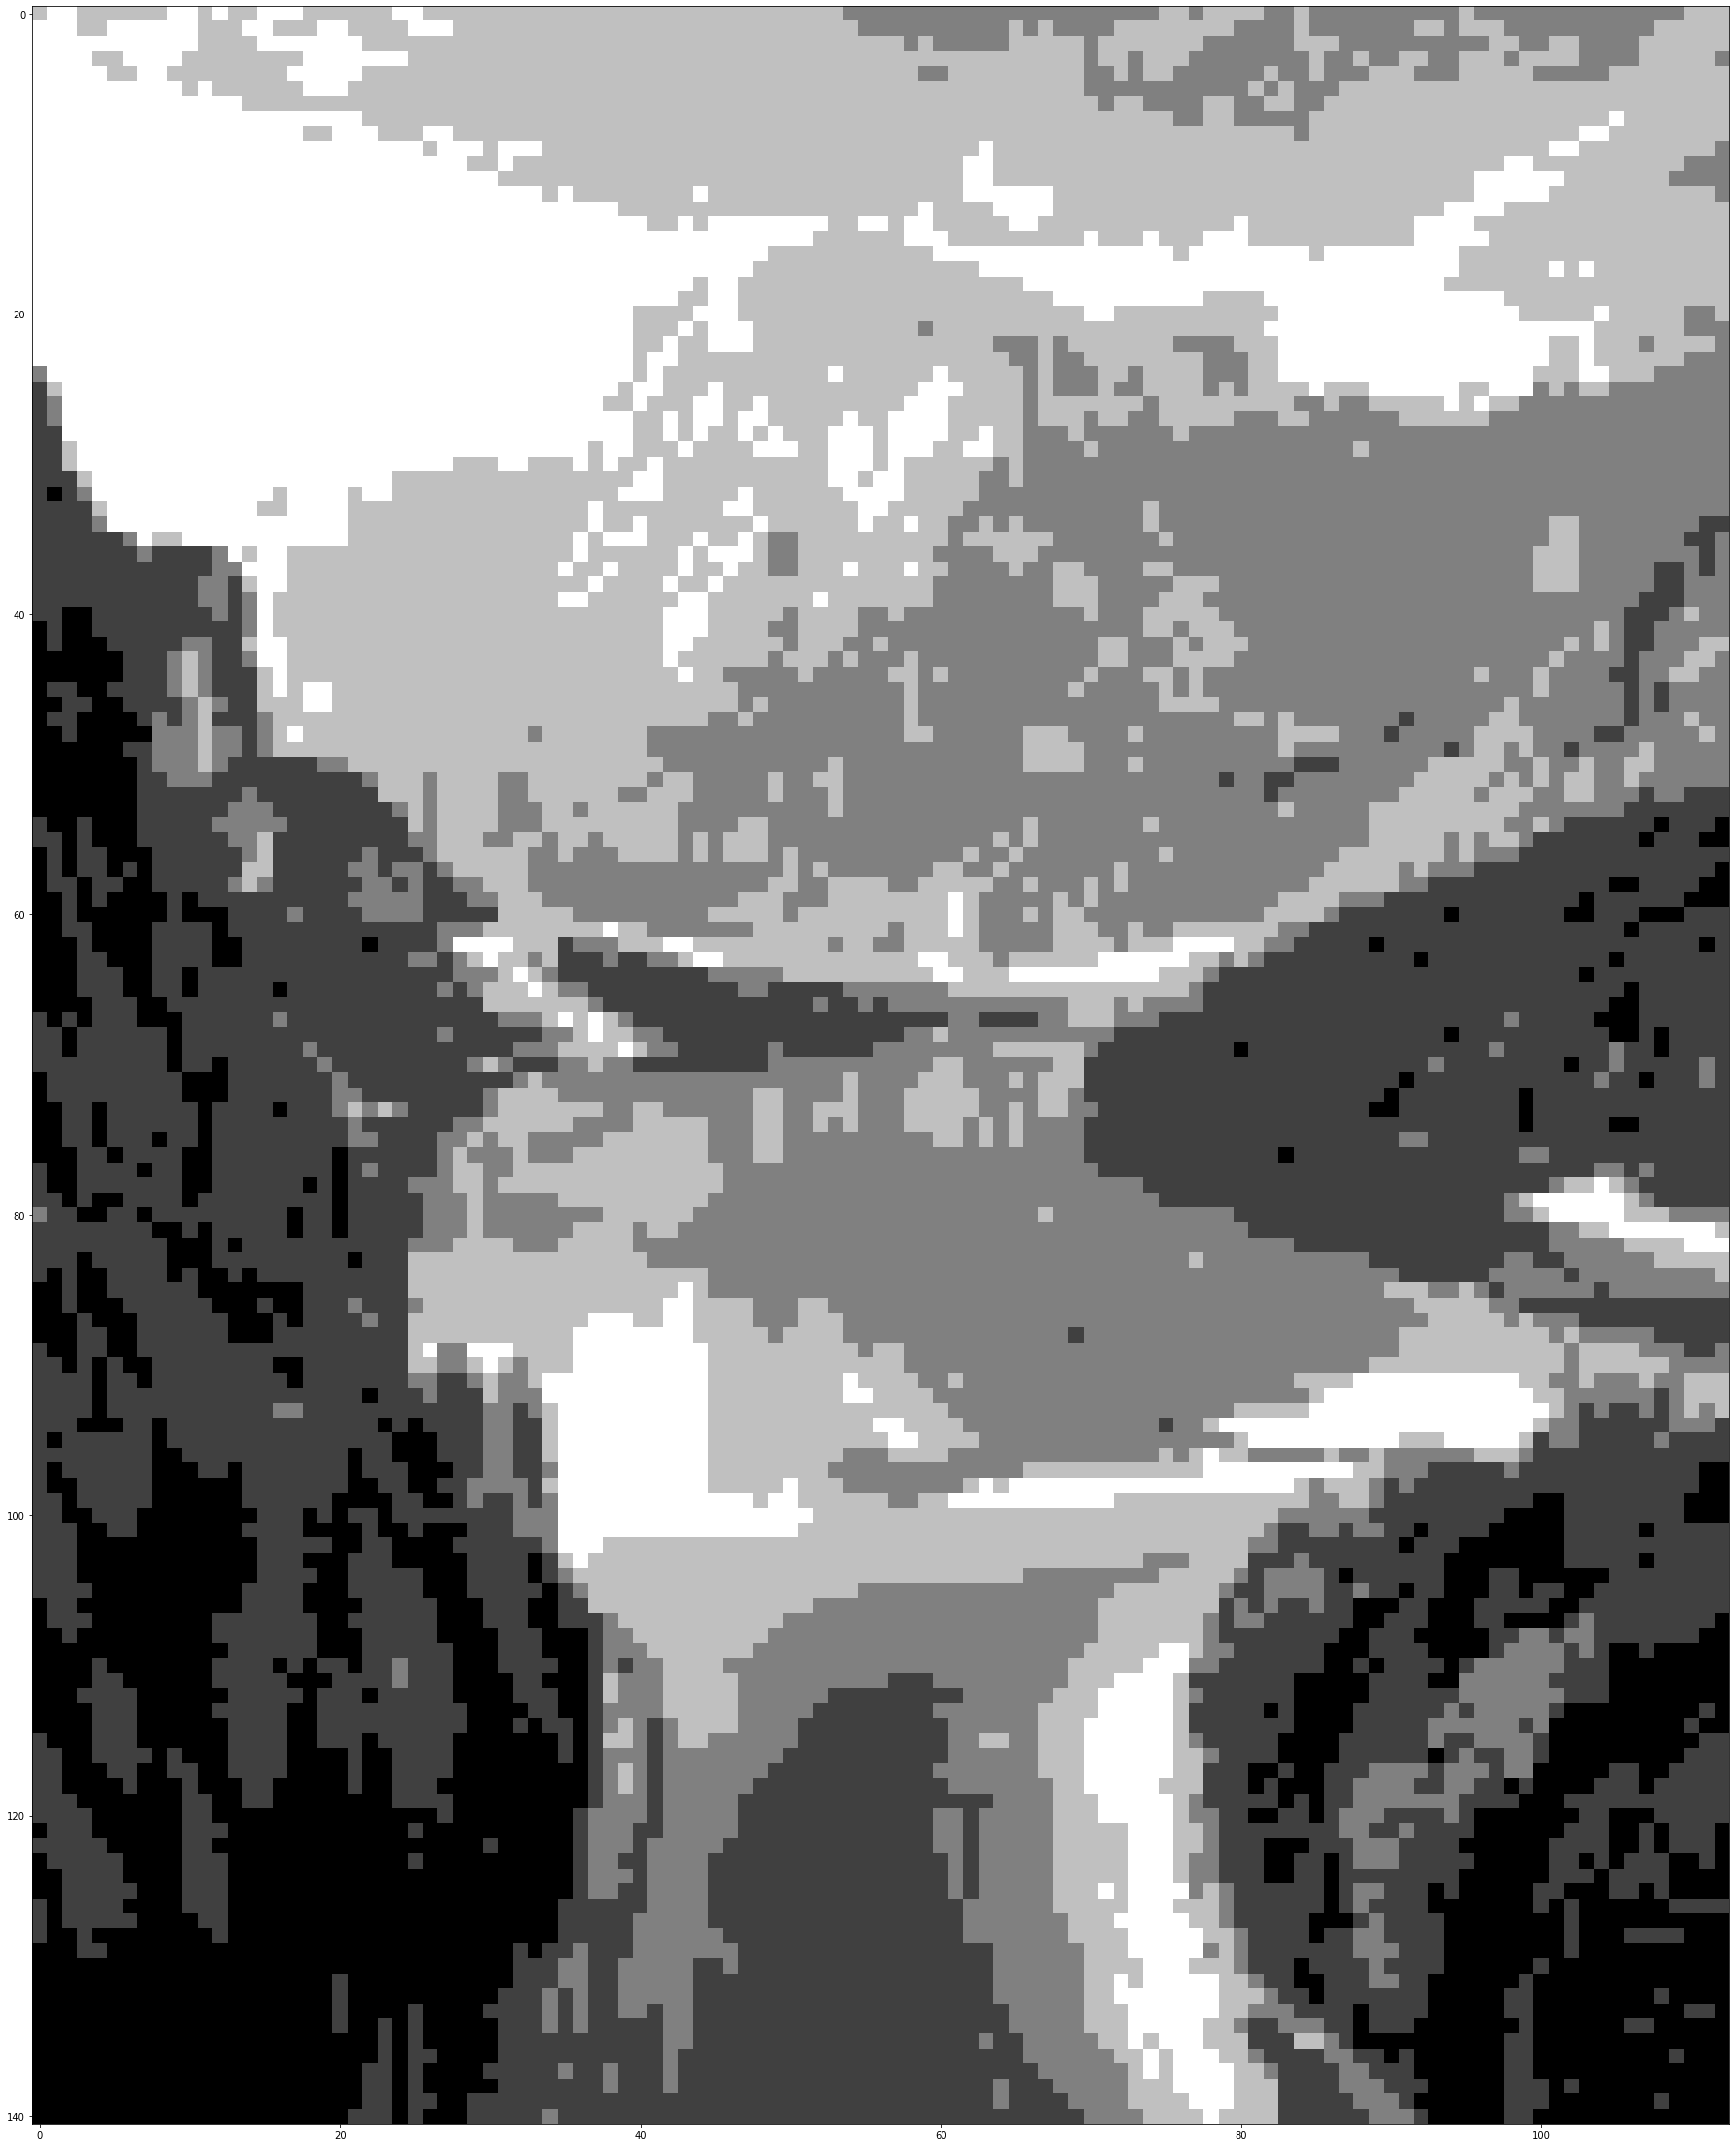

In [10]:
show_image(image_transform(image_read('scenery.jpg'), (5, 5), 5))

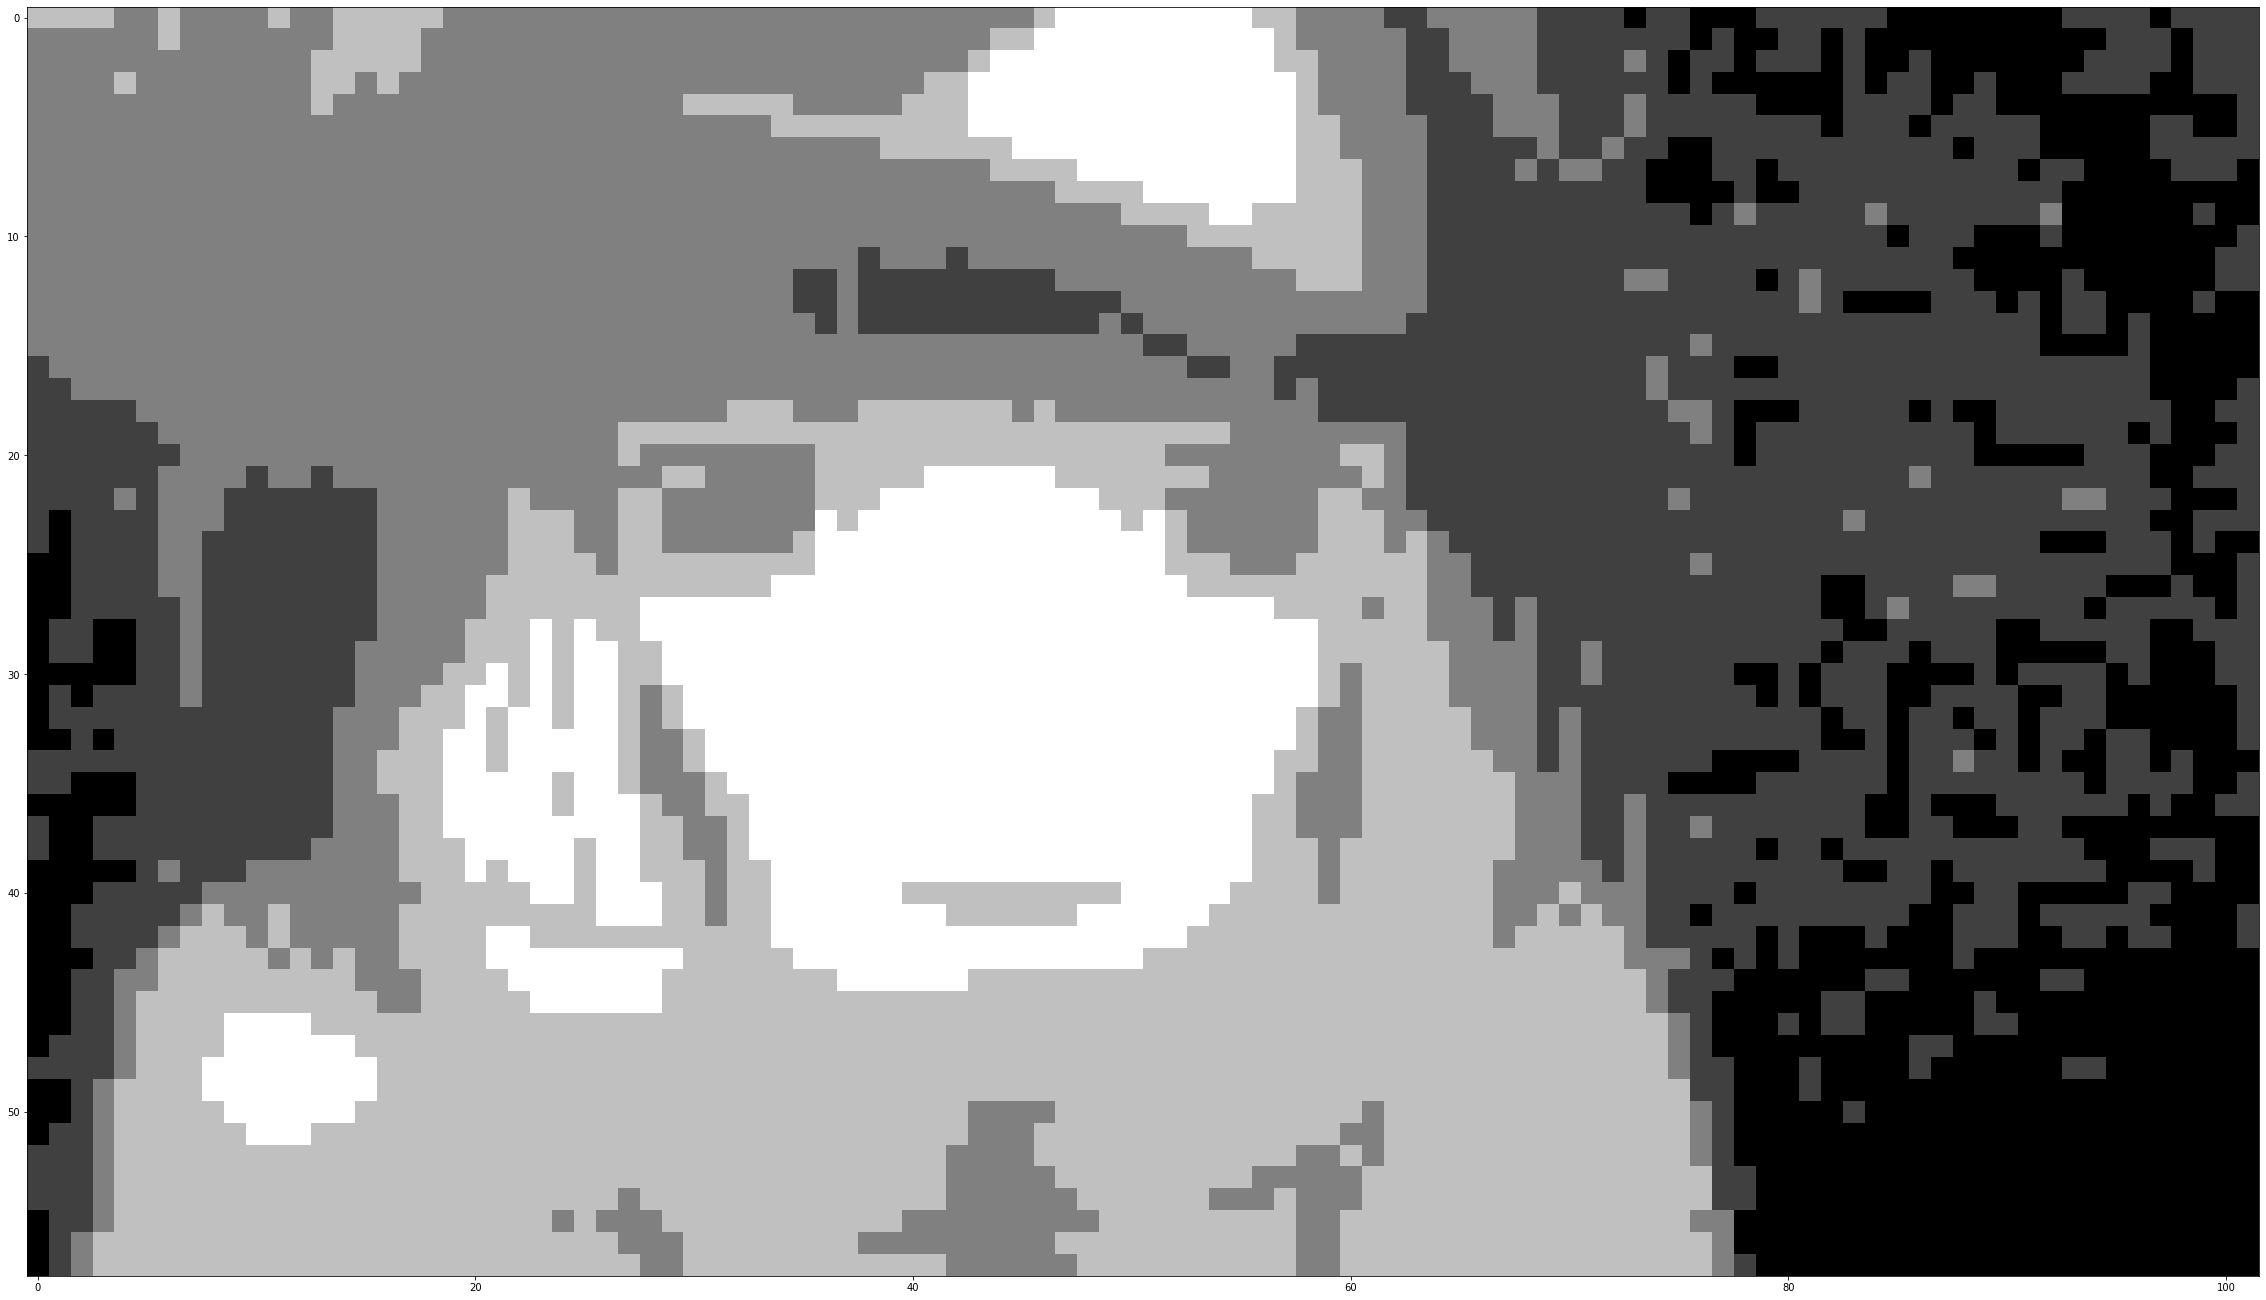

In [11]:
show_image(image_transform(image_read('nora.jpg'), (5, 5), 5))

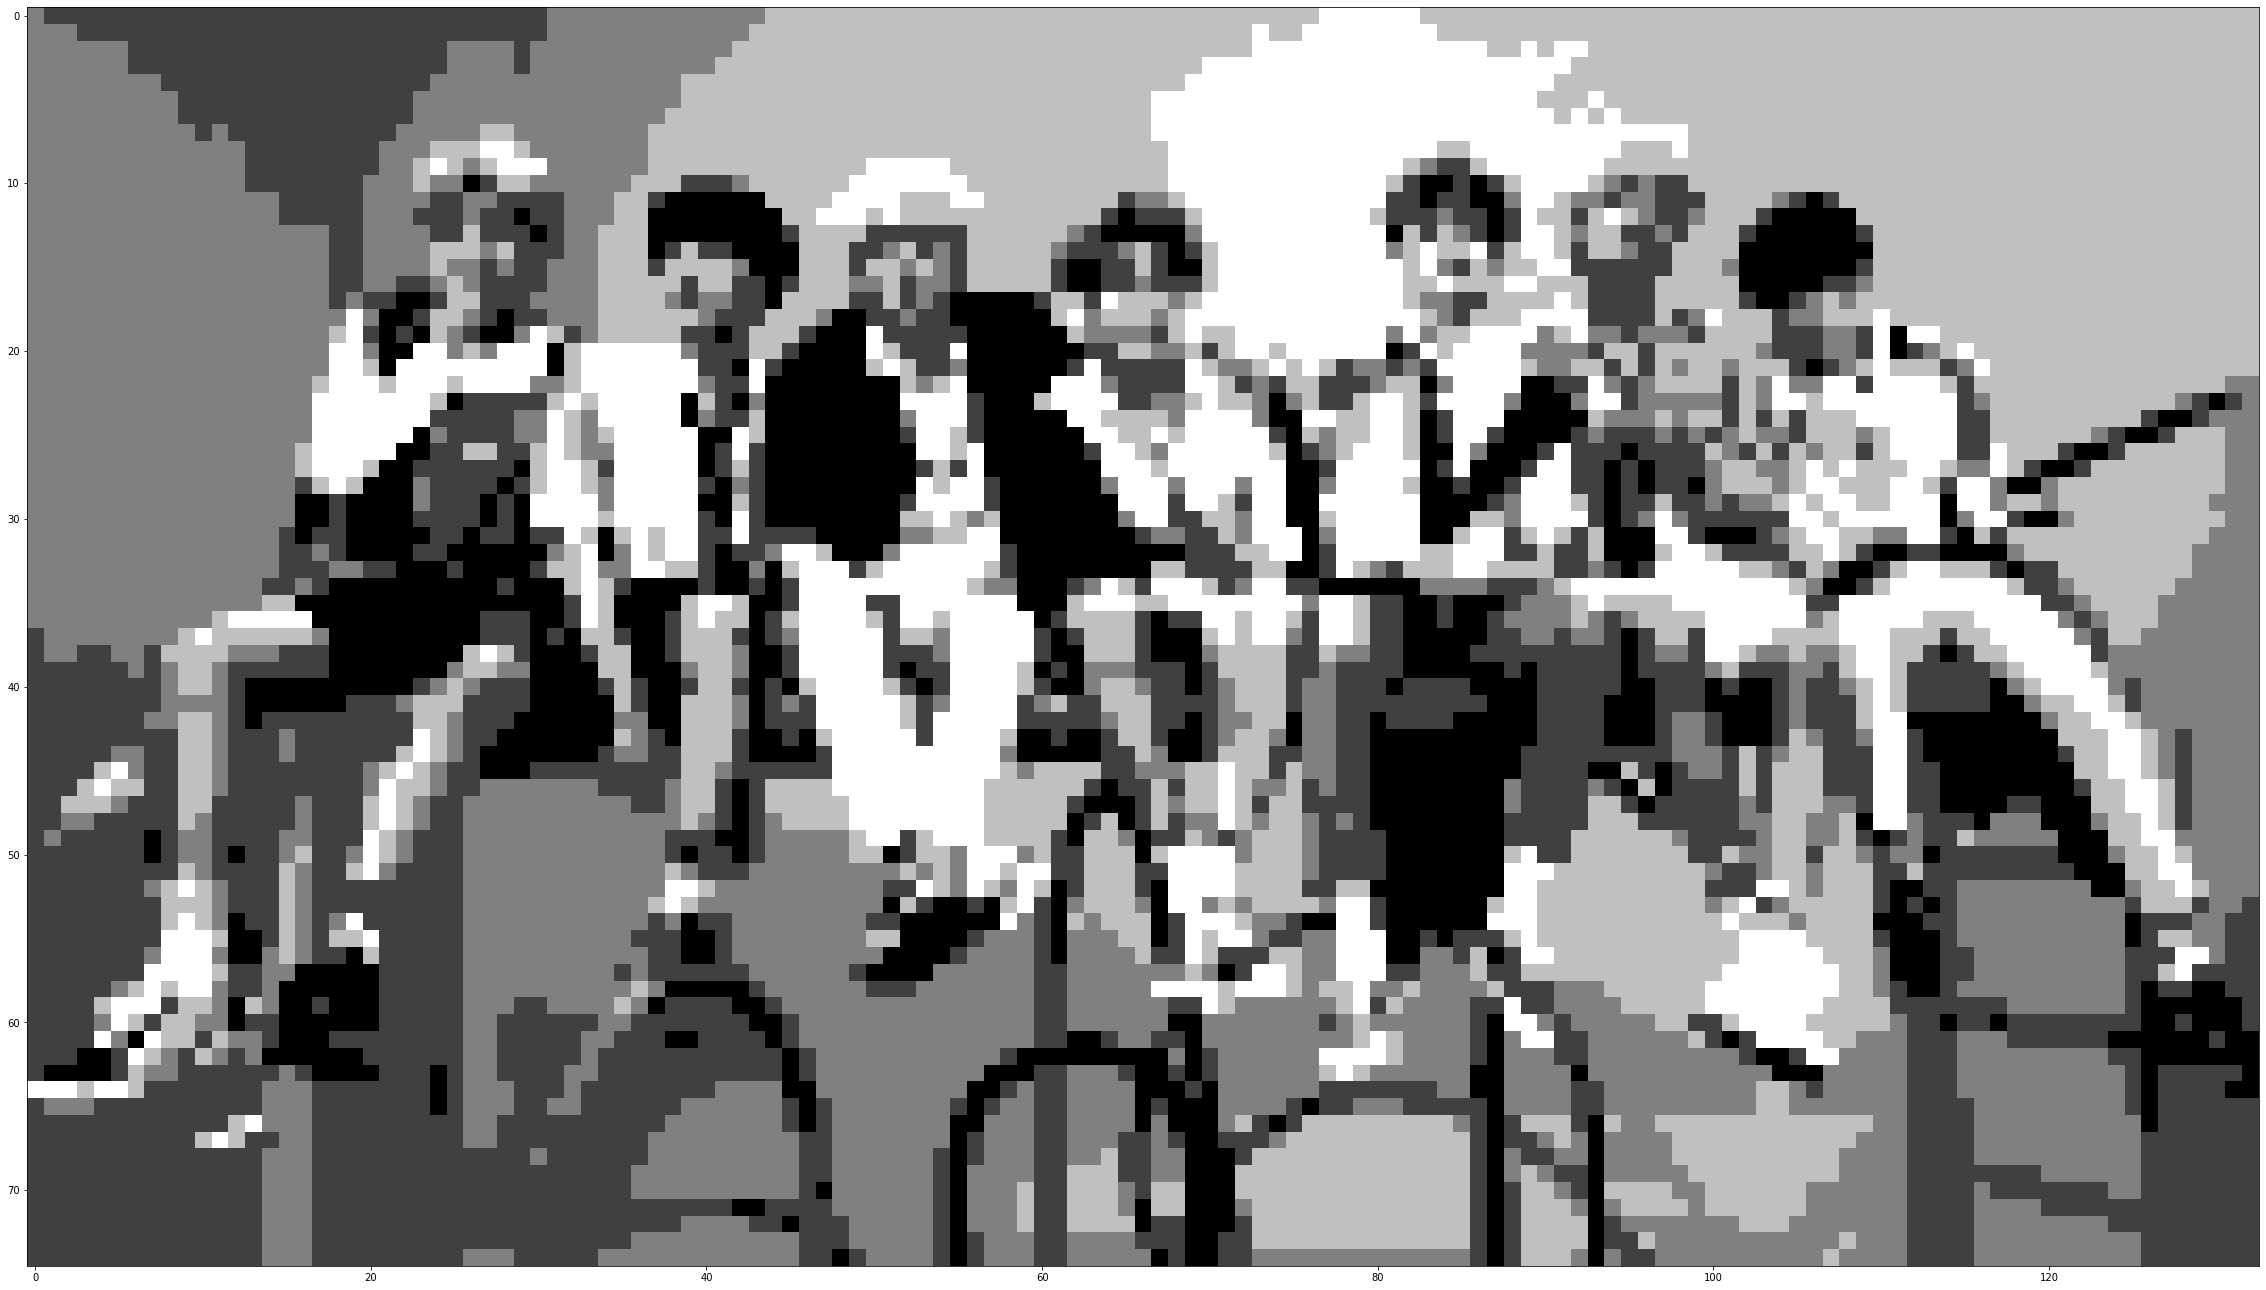

In [12]:
show_image(image_transform(image_read('bts.jpg'), (15, 15), 5))